In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [70]:
data = pd.read_csv('T.csv')

In [77]:
# create a differenced series
def difference(dataset, interval):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [112]:
Close = data['Close']
ADF1 = adfuller(Close)
print('Statistic: %f' % ADF1[0])
print('P-Value: %f' % ADF1[1])

newClose = difference(data['Close'], 1)
ADF = adfuller(newClose)
print('\nStatistic: %f' % ADF[0])
print('P-Value: %f' % ADF[1])

Statistic: -1.751931
P-Value: 0.404574

Statistic: -4.795625
P-Value: 0.000055


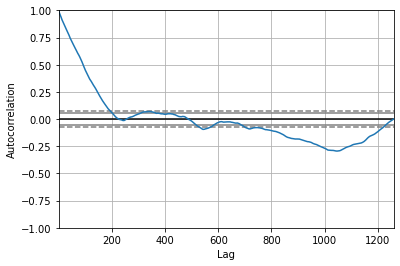

In [107]:
autocorrelation_plot(Close)
plt.show()

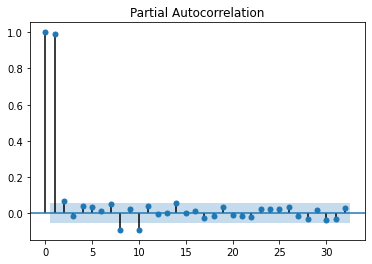

In [108]:
plot_pacf(Close)
plt.show()

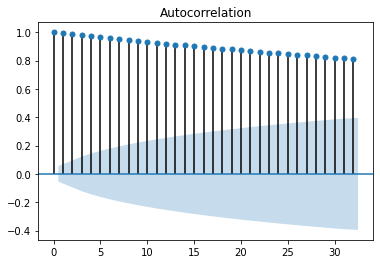

In [109]:
plot_acf(Close)
plt.show()

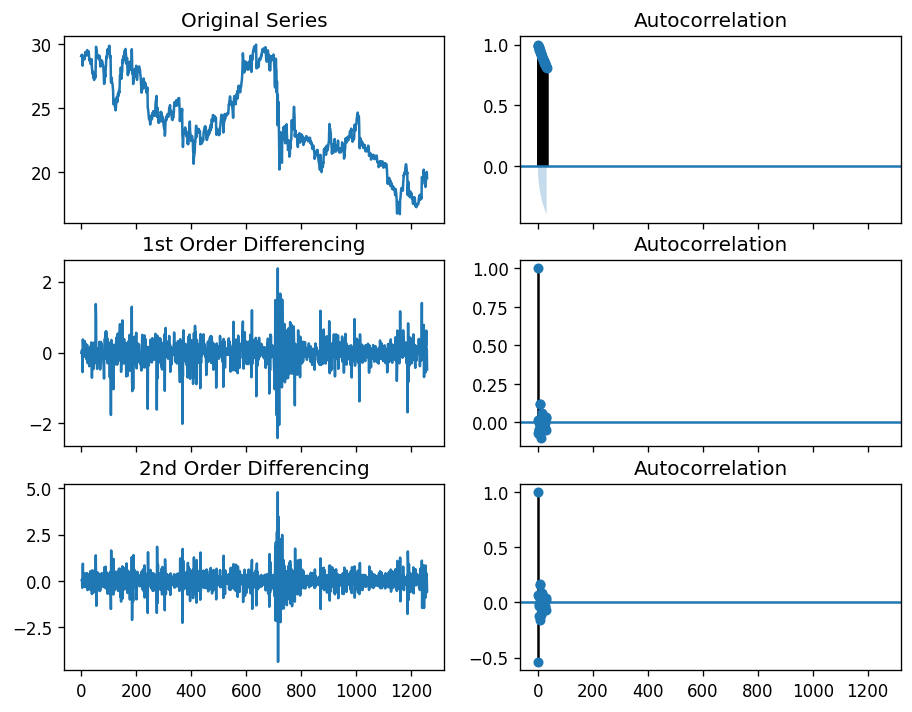

In [116]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('T.csv')
df = df['Close']

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [118]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(Close, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1258
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -551.911
Method:                       css-mle   S.D. of innovations              0.375
Date:                Tue, 10 May 2022   AIC                           1111.822
Time:                        18:11:13   BIC                           1132.371
Sample:                             1   HQIC                          1119.545
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0075      0.010     -0.750      0.453      -0.027       0.012
ar.L1.D.Close    -0.3375      0.291     -1.161      0.246      -0.907       0.232
ma.L1.D.Close     0.2678      0.297     

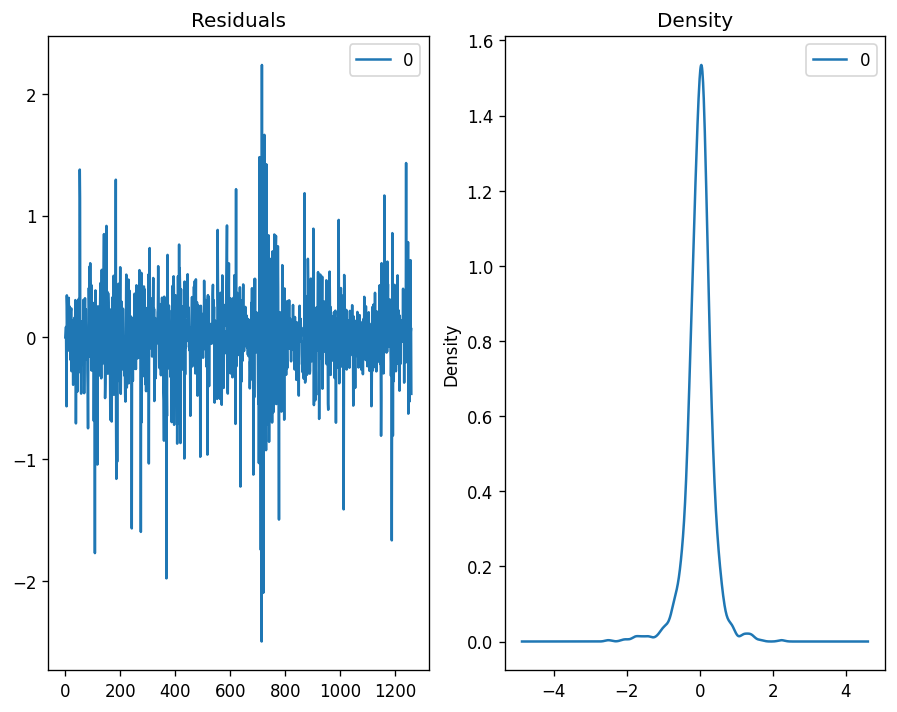

In [119]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

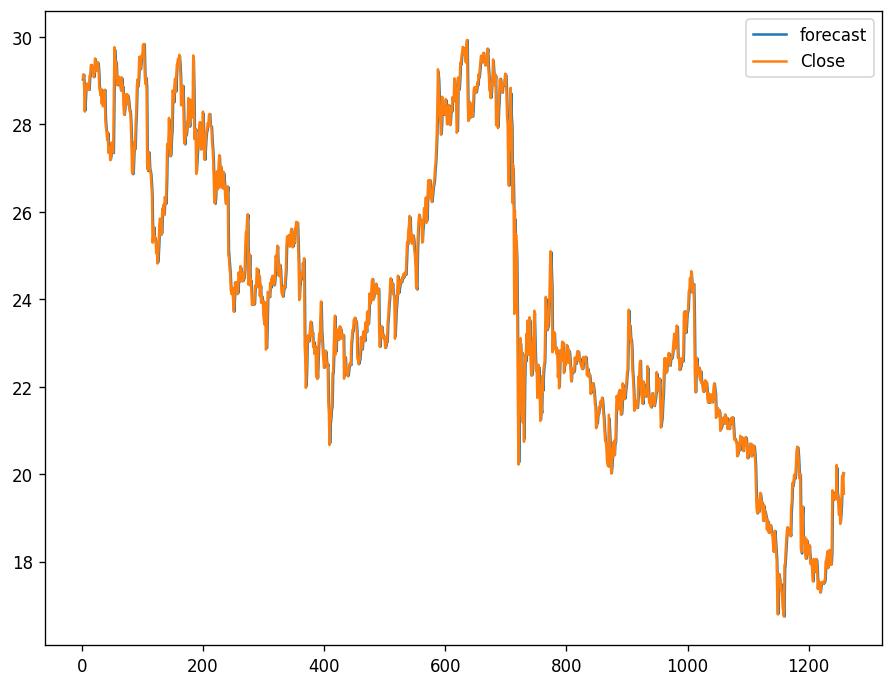

In [120]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [128]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = Close[:1059]
test = Close[1059:]

In [126]:
len(Close)

1259

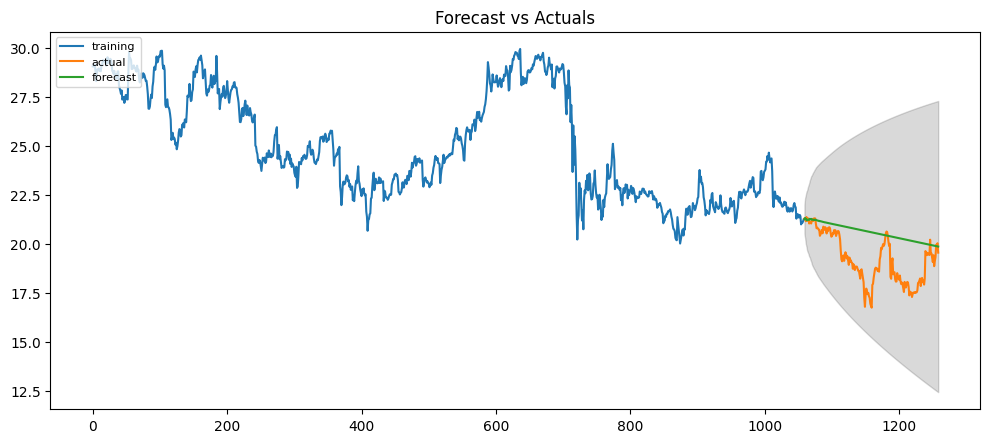

In [132]:
model = ARIMA(train, order=(20,1,1))
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(200, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()